In [4]:
import pandas as pd 
import numpy as np
import math
import IPython
import IPython.display
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
# import matplotlib as mpl
# import matplotlib.pyplot as plt



# mpl.rcParams['figure.figsize'] = (8, 6)
# mpl.rcParams['axes.grid'] = False

In [6]:
### Data collection

features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [7]:
features

array([[ 9.77075874e+00,  3.27621022e+00],
       [-9.71349666e+00,  1.12745180e+01],
       [-6.91330582e+00, -9.34755911e+00],
       [-1.08618591e+01, -1.07506350e+01],
       [-8.50038027e+00, -4.54370383e+00],
       [-4.82456978e+00, -5.20159136e+00],
       [-3.03819028e+00,  9.84354132e+00],
       [-8.17498253e+00, -6.24197227e+00],
       [ 3.91207254e+00,  9.45363489e+00],
       [-4.64425636e+00, -5.14863028e+00],
       [ 2.09082004e+00,  1.80947495e+00],
       [ 5.26539366e+00,  5.56781226e+00],
       [ 7.61826975e+00,  4.87112533e+00],
       [ 3.30512908e+00,  2.19832357e+00],
       [-9.29263277e-01,  2.48591905e+00],
       [-9.15936347e+00, -8.42060745e+00],
       [-2.70722546e+00,  1.17740016e+01],
       [-9.14073328e+00, -6.20996976e+00],
       [ 6.52709436e+00, -2.46179896e+00],
       [-2.51808095e+00, -1.02841022e+01],
       [ 1.04758084e+01,  4.81244915e+00],
       [ 3.33377923e+00,  1.76514294e-01],
       [-5.99215115e+00, -9.15499469e+00],
       [-2.

In [10]:
 # Normalization 
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [11]:
kmeans = KMeans(
        init="random",
        n_clusters=3,
        n_init=10,
        max_iter=300,
        random_state=42
    )


In [12]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [14]:
# The lowest SSE value
kmeans.inertia_


74.57960106819854

In [15]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732],
       [ 1.19539276,  0.13158148]])

In [17]:
# The number of iterations required to converge
kmeans.n_iter_

2

In [20]:
## Elbow method
kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }
   
    # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(scaled_features)
        sse.append(kmeans.inertia_)

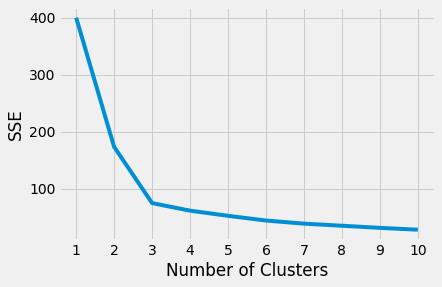

In [21]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [23]:
# Find elbow
kl = KneeLocator(
        range(1, 11), sse, curve="convex", direction="decreasing"
    )

kl.elbow

3

In [25]:
 # A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)
    


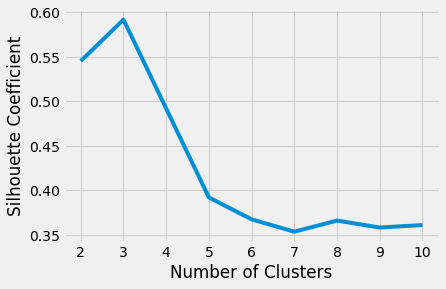

In [26]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()